# Reconstruct endomterium

This notebook is for...
using this data...

the aim is...
it contains....


In [1]:
import os
import novosparc
import scanpy as sc
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'

In [2]:
import inspect
inspect.getsourcelines(novosparc.geometry.create_target_space_from_image)

(['def create_target_space_from_image(image):\n',
  '    """Create a tissue target space from a given image. The image is assumed to\n',
  '    contain a black-colored tissue space in white background.\n',
  '    image -- the location of the image on the disk."""\n',
  '    img = imread(image)\n',
  '    img_width = img.shape[1]\n',
  '    img_height = img.shape[0]\n',
  '\n',
  '    locations = np.array([(x, y) for x in range(img_width) for y in range(img_height)\n',
  '                          if sum(img[y, x, :] == np.array([0, 0, 0]))])\n',
  '\n',
  '    return locations\n'],
 110)

## the data
downloaded here:
placed here on murphy:

In [3]:
# dirname = '/mnt/ramdisk'
dirname = '/dev/shm/ramdisk/'
# dirname = '/data/local/rajewsky/home/vschuma/Jackie/data/GarciaAlsono_uterus/'
fname = os.path.join(dirname,'uterus_histo.h5ad')

In [4]:
# read data
adata_full = sc.read(fname)
# only take the early secretory data (A30) - because that's where I have an image from.
adata = adata_full[adata_full.obs["DonorID"].isin(["A30"]),:]

In [5]:
adata.obs

,SampleID,log2p1_count,percent_mito,n_genes,DonorID,BiopsyType,Location,Binary Stage,Stage,Broad cell type,Cell type,CellCycle Phase
4861STDY7771115_AAACCTGAGACAGAGA,4861STDY7771115,12.012625,0.020818,1890,A30,Organ_Donor,endometrium_enriched,Secretory,early-secretory,Supporting,uSMC,G1
4861STDY7771115_AAACCTGAGGCATTGG,4861STDY7771115,11.933322,0.039642,1614,A30,Organ_Donor,endometrium_enriched,Secretory,early-secretory,Supporting,uSMC,G1
4861STDY7771115_AAACCTGCACCTGGTG,4861STDY7771115,10.854869,0.037817,930,A30,Organ_Donor,endometrium_enriched,Secretory,early-secretory,Supporting,PV MYH11,G1
4861STDY7771115_AAACCTGCATGGATGG,4861STDY7771115,12.135389,0.012005,1926,A30,Organ_Donor,endometrium_enriched,Secretory,early-secretory,Endothelial,Endothelial ACKR1,G1
4861STDY7771115_AAACCTGCATTTGCTT,4861STDY7771115,11.717248,0.019311,1622,A30,Organ_Donor,endometrium_enriched,Secretory,early-secretory,Stromal,dS,G1
...,...,...,...,...,...,...,...,...,...,...,...,...
4861STDY7771123_TTTGTCATCCACGCAG,4861STDY7771123,10.534303,0.027665,700,A30,Organ_Donor,endometrium_enriched,Secretory,early-secretory,Supporting,PV STEAP4,G1
4861STDY7771123_TTTGTCATCCACTCCA,4861STDY7771123,10.245553,0.065952,635,A30,Organ_Donor,endometrium_enriched,Secretory,early-secretory,Supporting,PV STEAP4,G1
4861STDY7771123_TTTGTCATCCCATTAT,4861STDY7771123,10.759888,0.052510,855,A30,Organ_Donor,endometrium_enriched,Secretory,early-secretory,Supporting,uSMC,G1
4861STDY7771123_TTTGTCATCGGTCTAA,4861STDY7771123,10.208235,0.016920,580,A30,Organ_Donor,endometrium_enriched,Secretory,early-secretory,Stromal,dS,G1


In [6]:
# get broad cell type
col_ct_broad = "Broad cell type"
# get cell types
col_ct = "Cell type"
genenames = list(adata.var.index)
#genenames[1:5]
ngenes = len(genenames)
types = list(adata.obs[col_ct].unique())
num_cells, num_genes = adata.shape

print('number of cells: %d' % num_cells)
print('Number of genes: %d' % ngenes)
print('Number of cells per cell-type:')
print(adata.obs[col_ct].value_counts())
print()
print('NUmber of cells per cell-type, broad tissue:')
print(adata.obs.groupby([col_ct, col_ct_broad]).size().unstack())

number of cells: 17000
Number of genes: 28614
Number of cells per cell-type:
uSMC                  7014
Endothelial ACKR1     2834
dS                    1874
PV MYH11              1639
PV STEAP4             1638
Glandular             1110
Fibroblast C7          460
Endothelial SEMA3G     186
Lymphoid               126
eS                      51
Myeloid                 37
Lumenal                 22
Other                    8
Ciliated                 1
Name: Cell type, dtype: int64

NUmber of cells per cell-type, broad tissue:
Broad cell type     Epithelial  Endothelial  Immune  Supporting  Stromal  \
Cell type                                                                  
Lumenal                     22            0       0           0        0   
Glandular                 1110            0       0           0        0   
Ciliated                     1            0       0           0        0   
Lymphoid                     0            0     126           0        0   
Myeloid      

In [7]:
# filtering excluded cells
included = ~(adata.obs[col_ct] == 'Excluded')
adata = adata[included]

In [8]:
# optional: subset cells
num_cells = 1000
sc.pp.subsample(adata, n_obs=num_cells)

### (Optional) Generate low dimensional representation of the data
To reduce the noise, capture meaningful expression distances between cells and reduce runtimes, it is advisable to decrease the dimension of gene expression. This can be done, for example, by either subsetting the gene expression matrix for highly variable genes or using PCA representation.

In [9]:
dge_rep = None # a representation of cells gene expression
sc.pp.highly_variable_genes(adata)
is_var_gene = adata.var['highly_variable']
var_genes = list(is_var_gene.index[is_var_gene])

# alternative 1: variable expressed genes representation
dge_rep = adata.to_df()[var_genes]
dge_rep

,SAMD11,HES4,ISG15,TNFRSF4,MXRA8,CCNL2,VWA1,SSU72,MMP23B,CDK11A,...,BACE2,MX1,RIPK4,ZBTB21,SIK1,PDXK,PFKL,SUMO3,FAM207A,PRMT2
4861STDY7771115_TGACTAGAGGCAGGTT,0.0,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0
4861STDY7771115_TCACAAGTCACATGCA,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0
4861STDY7771115_GGGACCTCATGCATGT,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.584962,0.0,0.0,0.0,1.0,0.0,0.0
4861STDY7771123_GTGAAGGGTTACTGAC,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4861STDY7771123_TCTCTAAGTAAGGGAA,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4861STDY7771123_GGACAGAAGAGACTTA,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4861STDY7771123_ACGGCCAAGACAAAGG,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4861STDY7771123_GCGGGTTTCCTGTACC,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4861STDY7771123_TACACGAAGGGAACGG,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0


In [10]:
# alternative 2: pca representation
# sc.pp.pca(adata)
# dge_rep = pd.DataFrame(adata.obsm['X_pca'])
# dge_rep
# sc.pl.pca_variance_ratio(adata, log=True)

         Falling back to preprocessing with `sc.pp.pca` and default params.


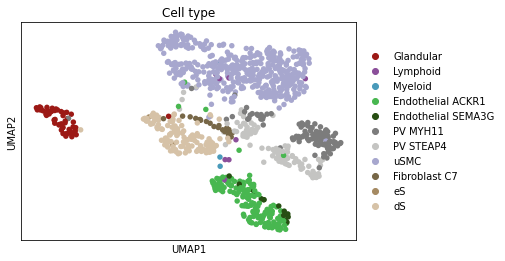

In [11]:
# make a umap just to see how it looks like
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=24)
sc.tl.umap(adata)
sc.pl.umap(adata, color="Cell type")

## Create a target space
### no prior knowledge of target space

novoSpaRc can create a target space by setting locations on certain basic shapes. Current supported shapes include filled circle, 2D torus projection, rectangular grid, sphere and torus. Grids can be populated with equidistant or randomly drawn points.

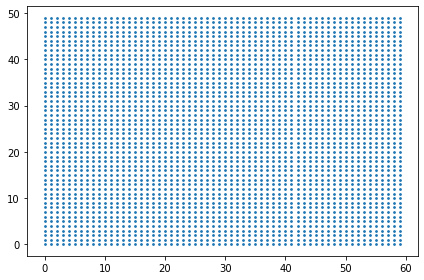

In [12]:
num_locations = 3000 # where does this come from?
locations_square = novosparc.gm.construct_target_grid(num_locations=num_locations)

tit_size = 15
dpi = 100
fig = plt.scatter(locations_square[:, 0], locations_square[:, 1], s=3)
plt.tight_layout()
plt.show()

### image shape from coordinates

We encountered the issue with proplonged runtime when mapping on a circle shape. One hypothesis is that it will be much better on a non geometrical shape.

In [13]:
# map_dir = ''
# target_space_path = os.path.join(map_dir, 'thailand.txt')
# locations = pd.read_csv(target_space_path, sep=' ')
# num_locations = 3039
# locations_apriori = locations.values

## image shape from tissue mask without exact locations

uterus, early secretory phase, sample image 152811 (retrieved from [here](https://www.ebi.ac.uk/arrayexpress/experiments/E-MTAB-9260/files/)
For sample overview see  [this doc](https://docs.google.com/spreadsheets/d/1c7K7C5ZKNTSnSxgTO7oJte0juwFMqmX3sjeS4wjXy4I/edit#gid=1885672978) )

In [16]:
# tissue_path = '../novosparc/datasets/tissue_example.png'
tissue_path = 'uterus_no_holes.png'
# tissue_path = 'uterus_mask.png'
locations_from_image = novosparc.gm.create_target_space_from_image(tissue_path)

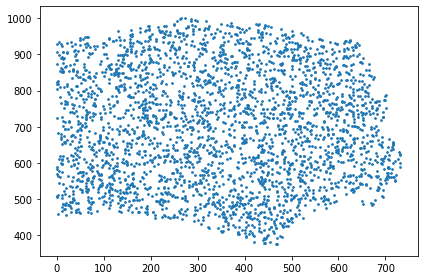

In [17]:
locations_from_image = locations_from_image[np.random.choice(locations_from_image.shape[0], num_locations), :]

tit_size = 15
dpi = 100
fig = plt.scatter(locations_from_image[:, 0], locations_from_image[:, 1], s=3)
plt.tight_layout()
plt.show()

## Reconstruct the tissue de novo
### Construct Tissue object
So far, we constructed the input for the spatial reconstruction. Thus we next initialise a tissue object with the cell expression dataset and target space locations.

In [18]:
# construct tissue object
tissue_grid = novosparc.cm.Tissue(dataset=adata, locations=locations_square)
tissue_image = novosparc.cm.Tissue(dataset=adata, locations=locations_from_image)

### Compute cost matrices
The OT framework interpolates between two assumptions, structural correspondence assumption and atlas assumption.

With the de novo reconstruction we only need the structural correspondence assumption. For the structural correspondence (smooth) assumption we set the cells and locations the number of neighbors to use for constructing the k-Nearest Neighbors graph.

In [19]:
num_neighbors_s = num_neighbors_t = 5

# since we don't have the atlas assumption, we can also setup only the smooth costs.
tissue_grid.setup_smooth_costs(dge_rep=dge_rep, num_neighbors_s=num_neighbors_s, num_neighbors_t=num_neighbors_t)
tissue_image.setup_smooth_costs(dge_rep=dge_rep, num_neighbors_s=num_neighbors_s, num_neighbors_t=num_neighbors_t)

Setting up for reconstruction ... done ( 3.03 seconds )
Setting up for reconstruction ... done ( 3.44 seconds )


In [20]:
tissue_grid.reconstruct(alpha_linear=0, epsilon=5e-3)
tissue_image.reconstruct(alpha_linear=0, epsilon=5e-3)

Reconstructing spatial information with 0 markers: 1000 cells and 3000 locations ... 
Trying with epsilon: 5.00e-03
Reconstructing spatial information with 0 markers: 1000 cells and 3000 locations ... 
Trying with epsilon: 5.00e-03


In [20]:
#tissue.sdge.shape

(28614, 9999)

### Compute OT of cells to locations with a given alpha parameter

Now we can reconstruct our tissue. The `alpha_linear` parameter controls the contribution of the two branches in `novoSpaRc`: `alpha_linear=0` means that no prior information is available, while `alpha_linear=1` implies that the reconstruction will be only based on the reference marker genes provided. Here we aim for a de novo reconstruction.

In addition to setting alpha_linear, epsilon, the coefficient of the entropy can also be set. A low epsilon will result in a more definitive mapping and a higher epsilon with a more continuous one. Choosing a low epsilon often leads to numerical errors. Therefore, if this is the case, we attempt reconstruction with a greater epsilon.

### Validate predicted expression over target space
Expression over the locations is computed and saved in tissue.sdge. This provides a genes x locations matrix describing the expression over the target space locations.

**Marker genes for endometrial tissue**
(source: [Garcia-Alonso et.al, Figure 2](https://www.nature.com/articles/s41588-021-00972-2/figures/2) )

epithelial marker : LGR5
lumenal cells:  KRT5
glandular cells: SCGB2A2

from Fig 1:
Stroma: IGF1,
dS (secretory stroma): CFD, CEBPB, PDGFRA
Fibroblasts: ACTA2, OGN


In [39]:
# reconstructed expression of individual genes
pl_genes = ['LGR5', # epithel
            'PAX2',# lumenal
            'SCGB2A2','PAEP', # glandular
            'IGF1', # stroma
            'CFD','CEBPB', 'PDGFRA', # secretory stroma
            'ACTA2', 'OGN' # fibroblasts
             ]
sdge_grid = tissue_grid.sdge
sdge_image = tissue_image.sdge

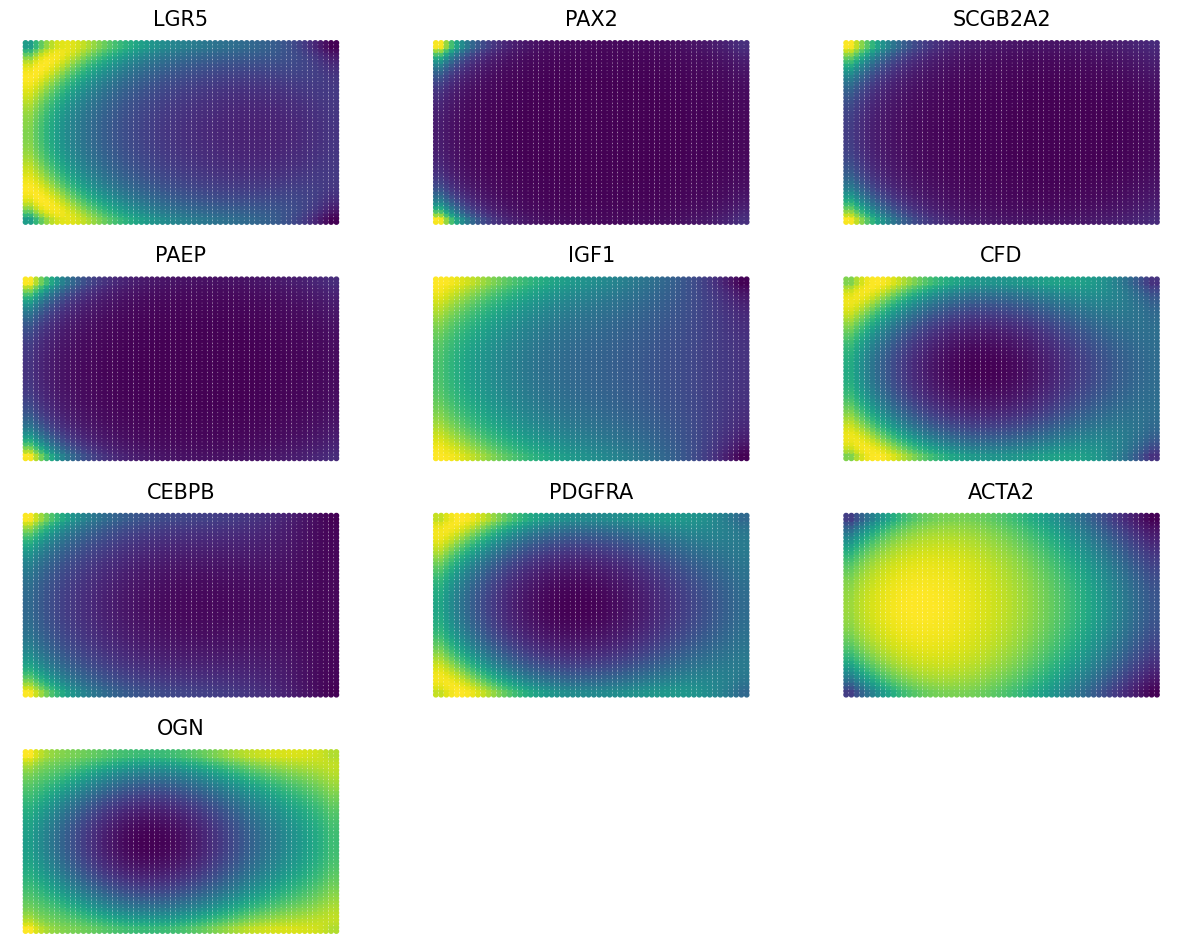

<Figure size 432x288 with 0 Axes>

In [40]:
dataset_reconst = sc.AnnData(pd.DataFrame(sdge_grid.T, columns=genenames))
dataset_reconst.obsm['spatial'] = locations_square

novosparc.pl.embedding(dataset_reconst, pl_genes)

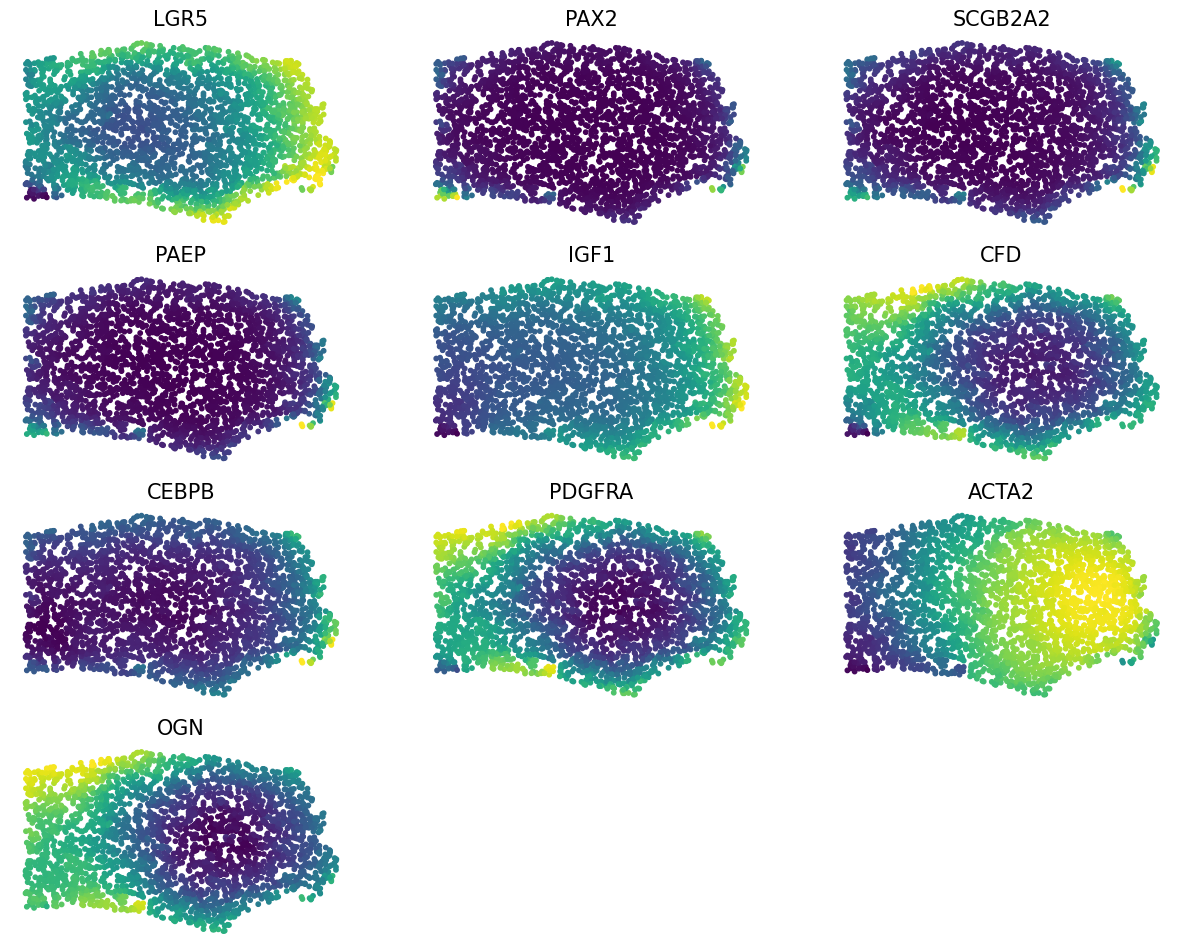

<Figure size 432x288 with 0 Axes>

In [41]:
dataset_reconst = sc.AnnData(pd.DataFrame(sdge_image.T, columns=genenames))
dataset_reconst.obsm['spatial'] = locations_from_image

novosparc.pl.embedding(dataset_reconst, pl_genes)

## Reconstruct on atlas

In [43]:
atlas_dir = ''
target_space_path = os.path.join(atlas_dir, 'endometr_coordinates.csv')
locations = pd.read_csv(target_space_path, sep=',')
num_locations = 3871
locations_apriori = locations[:num_locations][['x', 'y']].values

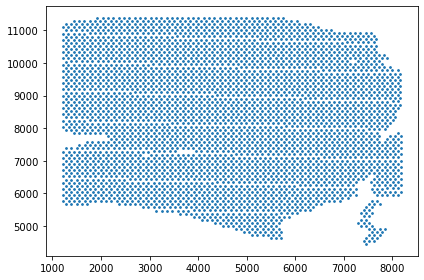

In [45]:
tit_size = 15
dpi = 100
fig = plt.scatter(locations_apriori[:, 0], locations_apriori[:, 1], s=3)
plt.tight_layout()
plt.show()

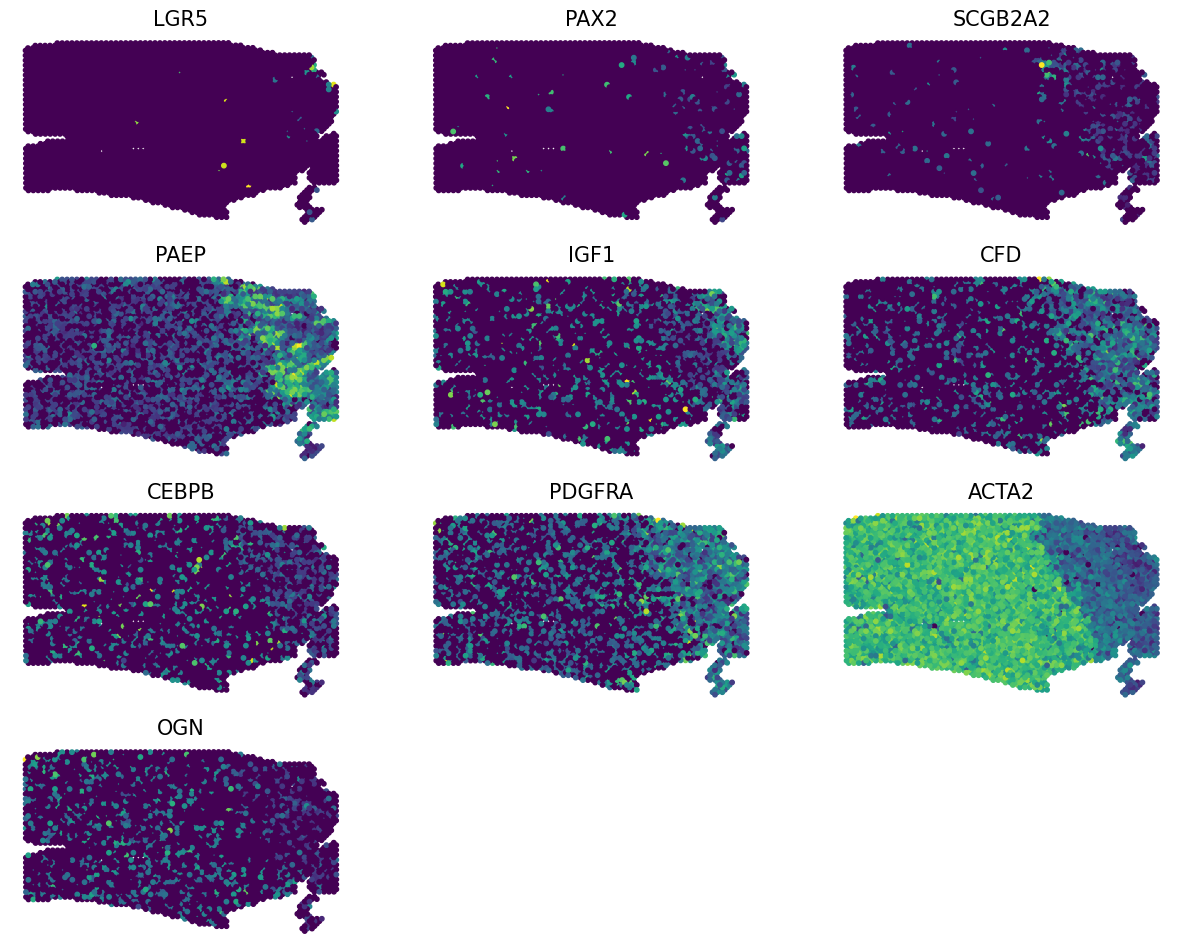

<Figure size 432x288 with 0 Axes>

In [46]:
# reading reference atlas
locations = locations_apriori
atlas_dir = ''
atlas_path = os.path.join(atlas_dir, 'endometrium_dge.csv')
atlas = sc.read(atlas_path)
atlas_genes = atlas.var.index.tolist()
atlas.obsm['spatial'] = locations

novosparc.pl.embedding(atlas, pl_genes)